In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import seaborn as sns
from config import geoapify_key
import os


ModuleNotFoundError: No module named 'config'

In [ ]:
# geoapify_key

In [2]:
# Our CSV file downloaded and put into a dataframe
uber_df = pd.read_csv('UberDataset.csv')
uber_df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
#Look at how many non null rows we have to work with
uber_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [4]:
# Cleaning data

# filling null purpose
uber_df["PURPOSE"] = uber_df["PURPOSE"].fillna("Miscellaneous")

# getting rid of null cells
uber_df.dropna(inplace = True)

# replacing mispelled values
uber_df = uber_df.replace({"START":{"R?walpindi":"Rawalpindi", "Kar?chi":"Karachi"}})
uber_df = uber_df.replace({"STOP":{"R?walpindi":"Rawalpindi", "Kar?chi":"Karachi"}})

uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Miscellaneous
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [6]:
uber_df.to_csv("output/cleaned_UberDataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'output/cleaned_UberDataset.csv'

In [16]:
# Data Exploration:

In [7]:
bins_variable = [0,5,10,15,20,25,30,50,100,150, 250]

Text(0, 0.5, 'Number of Rides')

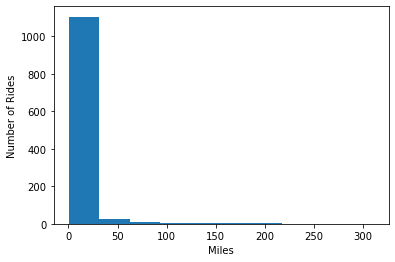

In [8]:
plt.hist(uber_df['MILES'])
plt.xlabel('Miles')
plt.ylabel('Number of Rides')

In [9]:
# change bins, label the axes...

In [10]:
bins_variable = [0,5,10,15,20,25,30,50,100,150, 250]

Text(0, 0.5, 'Number of Rides')

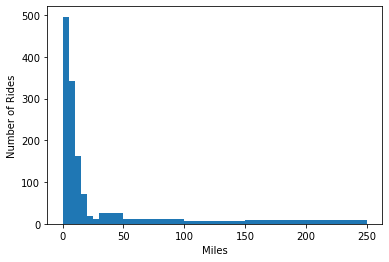

In [11]:
plt.hist(uber_df['MILES'], bins=bins_variable)
plt.xlabel('Miles')
plt.ylabel('Number of Rides')

In [12]:
bins_variable = [0,5,10,15,20,25,30,50,100,150, 250, 390]

Text(0, 0.5, 'Number of Rides')

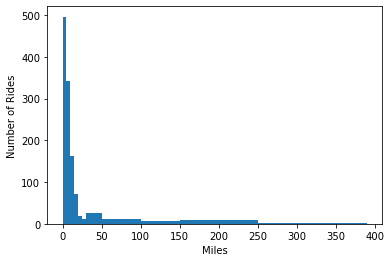

In [13]:
plt.hist(uber_df['MILES'], bins=bins_variable)
plt.xlabel('Miles')
plt.ylabel('Number of Rides')

In [14]:
# It's heavily right skewed.

In [15]:
# pie charts, line regression?, box and whisker? strip plot?

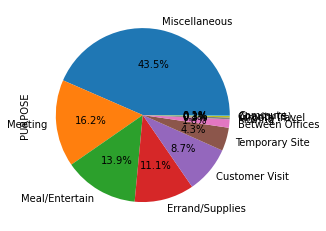

In [16]:
purpose_data = uber_df['PURPOSE'].value_counts()
purpose_data.plot.pie(autopct="%1.1f%%")
plt.show()

In [17]:
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Miscellaneous
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [18]:
uber_df['day_of_wk'] = uber_df['START_DATE'].dt.dayofweek

AttributeError: Can only use .dt accessor with datetimelike values

In [19]:
uber_df['START_DATE'].dtypes

dtype('O')

In [20]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [21]:
uber_df['START_DATE'].to_datetime()

AttributeError: 'Series' object has no attribute 'to_datetime'

In [22]:
# from datetime import datetime
# hello = datetime.strptime(date_string, format)


In [26]:

uber_df['day_wk'] = pd.to_datetime(uber_df['START_DATE'])

In [27]:
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day_wk
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Miscellaneous,2016-01-02 01:25:00
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00


In [33]:
hello = date.weekday(uber_df['day_wk'][0])

In [36]:
uber_df['new_days'] = uber_df['day_wk']

In [37]:
for i in range(len(uber_df)):
    uber_df['new_days'][i] = date.weekday(uber_df['day_wk'][i])

/var/folders/5n/x9wtpy7x0nz5qk_by1cbdbk40000gp/T/ipykernel_24097/2762856536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_df['new_days'][i] = date.weekday(uber_df['day_wk'][i])


In [38]:
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day_wk,new_days
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,4
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Miscellaneous,2016-01-02 01:25:00,5
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,5
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,1
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,2


In [39]:
uber_df['new_days_1'] = uber_df['new_days'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                                                4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

In [40]:
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day_wk,new_days,new_days_1
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,4,Friday
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Miscellaneous,2016-01-02 01:25:00,5,Saturday
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,5,Saturday
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,1,Tuesday
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,2,Wednesday


In [43]:
# uber_df.boxplot('START_DATE', by="new_days_1", figsize=(20, 10))

In [44]:
import scipy.stats as stats

In [45]:
# Extract individual groups
group0 = uber_df[uber_df["new_days"] == 0]["day_wk"]
group1 = uber_df[uber_df["new_days"] == 1]["day_wk"]
group2 = uber_df[uber_df["new_days"] == 2]["day_wk"]
group3 = uber_df[uber_df["new_days"] == 3]["day_wk"]
group4 = uber_df[uber_df["new_days"] == 4]["day_wk"]
group5 = uber_df[uber_df["new_days"] == 5]["day_wk"]
group6 = uber_df[uber_df["new_days"] == 6]["day_wk"]






# group1 = df[df["num_workouts"] == 1]["resting_heart_rate"]
# group2 = df[df["num_workouts"] == 2]["resting_heart_rate"]
# group3 = df[df["num_workouts"] == 3]["resting_heart_rate"]
# group4 = df[df["num_workouts"] == 4]["resting_heart_rate"]

In [46]:
# Perform the ANOVA
stats.f_oneway(group0, group1, group2, group3, group4, group5, group6)

F_onewayResult(statistic=2.612649417410859, pvalue=0.016089056495715532)